
 - 目标：以前70%为训练集，后30%为测试集，评估测试集合中未离开的客户是否会离开银行（每个客户离开银行的概率）。



#### 数据清洗

In [1]:
%run Tools.py

In [2]:
jupyter_settings()
ignore_warnings()

In [3]:
df = pd.read_excel('4-3-算法工程师笔试题.xlsx',sheet_name='数据')
df

<IPython.core.display.Javascript object>

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# 数据描述
# dict_col = {'RowNumber':'对应于记录（行）号',
# 'CustomerId':'客户编号包含随机值',
# 'Surname':'客户的姓氏',
# 'CreditScore':'客户信用评分',
# 'Geography':'客户的位置',
# 'Gender':'客户性别',
# 'Age':'客户年龄',
# 'Tenure':'银行客户的年限',
# 'Balance':'帐户余额较高',
# 'NumOfProducts':'银行购买的产品数量',
# 'HasCrCard':'表示客户是否有信用卡（1有0没有）',
# 'IsActiveMember':'客户是否活跃（1活跃0不活跃）',
# 'EstimatedSalary':'客户薪金',
# 'Exited':'客户是否离开银行'}


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe([.90,.99])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
99%,9900.01000,1.581311e+07,850.000000,72.000000,10.000000,185967.985400,3.000000,1.00000,1.000000,198069.734500,1.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### 特征选择
   - 这里我使用的是分箱计算iv值

In [8]:
# 先删掉一些明显无关的特征
df.drop(columns=['CustomerId','Surname','RowNumber'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#将字符串转换为数字
df['Geography'] = df['Geography'].factorize()[0]
df['Gender'] = df['Gender'].factorize()[0]

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# 对数据分箱处理
%run auto_bin.py

In [13]:
# 创建autobin对象
#  frame：df，需要包括data,target
#  y:  target对应的列名
ab = AutoBins(df, 'Exited')

In [14]:
# 现在我们需要对所有的特征做分箱, 得到每个特征的最佳分组数
# column: 对哪一列做分箱
# n: 分成几组，默认是分成2组
# show_iv: 是否显示打印结果
for col in df.columns[ : -1]:
    ab.auto_bins(column=col)
    print('-' * 100)

对 CreditScore 列进行分箱: 
分组个数: 19 	iv值: 0.015393598293390006
分组个数: 18 	iv值: 0.015383534427045143
分组个数: 17 	iv值: 0.015341099879716408
分组个数: 16 	iv值: 0.015286493907483854
分组个数: 15 	iv值: 0.01522251225869304
分组个数: 14 	iv值: 0.015138537878365247
分组个数: 13 	iv值: 0.015040297007498643
分组个数: 12 	iv值: 0.014872011801372244
分组个数: 11 	iv值: 0.01458169314352881
分组个数: 10 	iv值: 0.014239994697086271
分组个数: 09 	iv值: 0.013927793329502666
分组个数: 08 	iv值: 0.01326307694441619
分组个数: 07 	iv值: 0.0128486987230159
分组个数: 06 	iv值: 0.0119809048661001
分组个数: 05 	iv值: 0.01162021783833609
分组个数: 04 	iv值: 0.009399129479201466
分组个数: 03 	iv值: 0.007009746777922044
分组个数: 02 	iv值: 0.004836538924374143

最后分箱情况: 
分组个数: 02 	iv值: 0.004836538924374143

分组woe情况：
     min    max  count_0  count_1  total  percentage  bad_rate       woe
0   -inf  652.0     3953     1082   5035      0.5035  0.214896 -0.067664
1  652.0    inf     4010      955   4965      0.4965  0.192346  0.071508
---------------------------------------------------------------

In [15]:
# 确定每个特征的最佳分组个数
# 如果iv值相差不大则取更少的分箱
# 综上我们可以确定特征分箱数
bins_num_dict = {
    'CreditScore': 2,
    'Geography': 2,
    'Gender': 2,
    'Age': 6,
    'Balance': 3,
    'Tenure': 4,
    'Balance': 2,
    'NumOfProducts': 2,
    'HasCrCard': 2,
    'IsActiveMember': 2,
    'EstimatedSalary': 2
}

In [16]:
# 再使用最佳分组数对每个特征重新分箱
bins_dict = { }
woe_dict = { }
iv_dict = { }
for col in df.columns[ : -1]:
    num_bins, woe_df, iv = ab.auto_bins(column=col, n=bins_num_dict[col], show_iv=False)
    bins_dict[col] = num_bins
    woe_dict[col] = woe_df
    iv_dict[col] = iv

<AxesSubplot:>

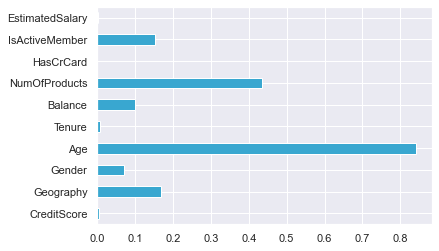

In [17]:
# 删除iv值低的特征值
# '''
# iv <0.03    无预测能力
# (0.03,0.09) 低
# (0.1,0.29)  中
# (0.3,0.49)  高
# iv > 0.5    极高

# '''
pd.Series(iv_dict).plot(kind='barh')

In [18]:
# 考虑只保留iv > 0.1的值
cond = pd.Series(iv_dict) >= 0.1
feature_importances = pd.Series(iv_dict)[cond].index.tolist()
feature_importances

['Geography', 'Age', 'NumOfProducts', 'IsActiveMember']

#### 划分数据集

 - 选取data和target 

In [19]:
data = df[['Geography','Age','NumOfProducts','IsActiveMember']]
data.head()

,Geography,Age,NumOfProducts,IsActiveMember
0,0,42,1,1
1,1,41,1,1
2,0,42,3,0
3,0,39,2,0
4,1,43,1,1


In [20]:
target = df.Exited
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

 - 以前70%为训练集，后30%为测试集

In [22]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3,shuffle=False)

#### 算法建模

In [23]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 7000 entries, 0 to 6999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
7000 non-null   int64
dtypes: int64(1)
memory usage: 109.4 KB


<AxesSubplot:>

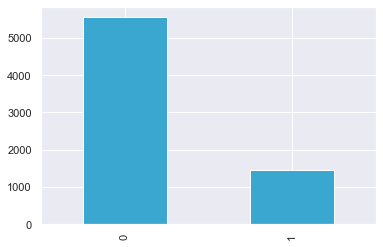

In [24]:
# 样本处理
y_train.value_counts().plot(kind='bar')

 - 正负样本不平衡

In [25]:
# 使用smote进行过采样
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE()

In [27]:
x_train_sample,y_train_sample = smote.fit_resample(x_train,y_train)

In [28]:
x_train_sample.shape, y_train_sample.shape

((11114, 4), (11114,))

<AxesSubplot:>

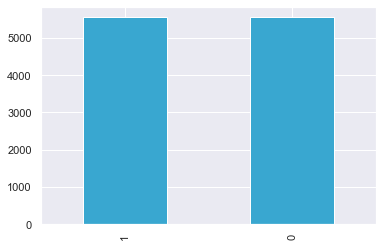

In [29]:
y_train_sample.value_counts().plot(kind='bar')

In [30]:
# 检测并处理过采样后的数据
x_train_sample.isnull().any(axis=1).sum()

0

In [31]:
y_train_sample.isnull().any().sum()

0

 - 无空值，重复值不做处理

In [32]:
# 使用xgboost
from xgboost import XGBClassifier

In [33]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [34]:
xgbc.score(x_train,y_train)

0.8677142857142857

In [35]:
xgbc.score(x_test,y_test)

0.8603333333333333

- 调参

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {'max_depth': [1, 3, 5],
             'n_estimators': [50, 100, 150],
             'learning_rate': [0.01, 0.05, 0.1, 0.2]}

gv = GridSearchCV(xgbc, parameters,n_jobs=-1)

In [38]:
gv.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [39]:
# 最佳得分
gv.best_score_

0.857

In [40]:
# 最佳模型
best_xgbc = gv.best_estimator_

In [41]:
best_xgbc.score(x_test,y_test)

0.863

In [42]:
best_xgbc.score(x_train,y_train)

0.8601428571428571

 - 调整前后差距不大

In [43]:
# 特征重要性
best_xgbc.feature_importances_

array([0.16034743, 0.27056852, 0.2577441 , 0.31134   ], dtype=float32)

 - 也可以用特征重要性来选择特征
 - 使用其他算法预测得分基本相似

#### 混淆矩阵

In [44]:
y_pred = best_xgbc.predict(x_test)
pd.crosstab(
    index=y_pred, 
    columns=y_test,
    rownames=['预测'],
    colnames=['真实'],
    margins=True
)

真实,0,1,All
预测,,,
0,2319,324,2643
1,87,270,357
All,2406,594,3000


In [45]:
df_tem1 = pd.DataFrame(y_pred,columns=['pred'])
df_tem1

,pred
0,0
1,0
2,0
3,1
4,0
...,...
2995,0
2996,0
2997,0
2998,0


#### 画图
 - recall召回率，precision精准率，F1值，accuracy准确率
 - ROC曲线

In [46]:
from sklearn.metrics import auc, roc_curve, roc_auc_score, \
recall_score, precision_score, f1_score, accuracy_score

In [47]:
y_pred = best_xgbc.predict(x_test)
y_true = y_test

In [48]:
recall_score(y_true, y_pred)

0.45454545454545453

In [49]:
precision_score(y_true, y_pred)

0.7563025210084033

In [50]:
# 设置不同的阈值
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [51]:
def get_score(y_true, y_proba, threshold, show):
    y_pred = (y_proba[:, -1] >= threshold) * 1
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    if show:
        print('threshold:', threshold)
        print("recall:", recall)
        print("precision:", precision)
        print("f1:", f1)
        print("accuracy:", accuracy)
        print('*' * 100)
    return recall, precision, f1, accuracy

In [52]:
def get_score_df( data_X,data_y,model,show = False):
    scores_dict = {}
    y_proba = model.predict_proba(data_X)
    for threshold in np.linspace(0.1,1,10):
        scores = get_score(data_y,y_proba,threshold,show = show)
        scores_dict[threshold] = scores
        scores_df = pd.DataFrame(scores_dict).T
        scores_df.columns = ['recall', 'precision', 'f1', 'accuracy']
    return scores_df

In [53]:
scores_df = get_score_df(x_test, y_test, best_xgbc)
scores_df

,recall,precision,f1,accuracy
0.1,0.910774,0.307911,0.460230,0.577000
0.2,0.744108,0.484649,0.586985,0.792667
0.3,0.597643,0.599662,0.598651,0.841333
0.4,0.506734,0.688787,0.583899,0.857000
0.5,0.454545,0.756303,0.567823,0.863000
0.6,0.353535,0.826772,0.495283,0.857333
0.7,0.287879,0.890625,0.435115,0.852000
0.8,0.185185,0.932203,0.308989,0.836000
0.9,0.079125,0.979167,0.146417,0.817333
1.0,0.000000,0.000000,0.000000,0.802000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

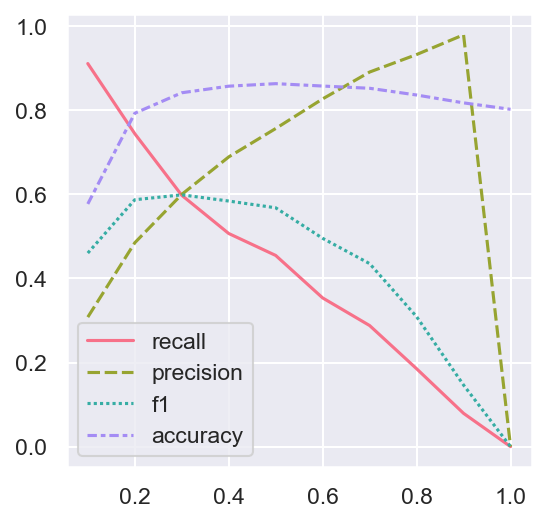

In [54]:
plt.figure(figsize=(4,4),dpi=150)
sns.lineplot(data=scores_df)
plt.show()

In [55]:
# ROC曲线
y_proba2 = best_xgbc.predict_proba(x_test)
y_score = y_proba2[:, -1]
fpr, tpr, _ = roc_curve(y_test, y_score)
fpr, tpr

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.15627598e-04, 4.15627598e-04,
        4.15627598e-04, 4.15627598e-04, 4.15627598e-04, 4.15627598e-04,
        4.15627598e-04, 4.15627598e-04, 4.15627598e-04, 1.24688279e-03,
        1.24688279e-03, 1.24688279e-03, 1.66251039e-03, 1.66251039e-03,
        2.90939318e-03, 2.90939318e-03, 2.90939318e-03, 3.32502078e-03,
        3.74064838e-03, 4.15627598e-03, 4.57190357e-03, 4.57190357e-03,
        4.98753117e-03, 4.98753117e-03, 5.40315877e-03, 6.23441397e-03,
        7.06566916e-03, 7.06566916e-03, 8.72817955e-03, 8.72817955e-03,
        8.72817955e-03, 8.72817955e-03, 9.14380715e-03, 9.14380715e-03,
        1.12219451e-02, 1.24688279e-02, 1.24688279e-02, 1.28844555e-02,
        1.45469659e-02, 1.66251039e-02, 1.70407315e-02, 1.74563591e-02,
        1.74563591e-02, 1.78719867e-02, 1.82876143e-02, 1.870324

In [56]:
fpr.shape, tpr.shape

((255,), (255,))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.8489984354489757

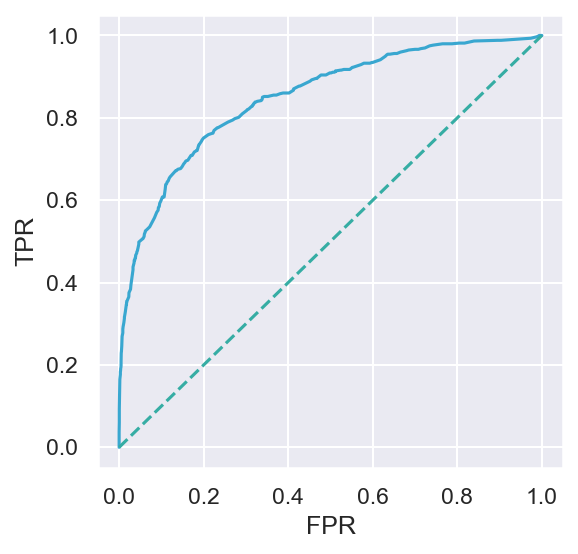

In [57]:
plt.figure(figsize=(4,4),dpi = 150)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1], ls='--')
auc(fpr,tpr)

#### 保存模型

In [58]:
import joblib

In [59]:
# joblib.dump(best_xgbc, 'best_xgbc.plk')

#### 是否离开银行

In [60]:
df_tem2 = pd.DataFrame(best_xgbc.predict_proba(x_test),columns=['stay_proba','leave_proba'])
df_tem2

,stay_proba,leave_proba
0,0.881468,0.118532
1,0.612313,0.387687
2,0.935180,0.064820
3,0.376842,0.623158
4,0.654169,0.345831
...,...,...
2995,0.926952,0.073048
2996,0.894395,0.105605
2997,0.891979,0.108021
2998,0.861840,0.138160


In [61]:
x_test.reset_index(inplace=True)

In [62]:
df_pred = pd.concat([ x_test,df_tem1,df_tem2],axis=1)

In [63]:
df_pred

,index,Geography,Age,NumOfProducts,IsActiveMember,pred,stay_proba,leave_proba
0,7000,0,28,1,0,0,0.881468,0.118532
1,7001,2,48,2,0,0,0.612313,0.387687
2,7002,2,32,2,0,0,0.935180,0.064820
3,7003,2,44,1,0,1,0.376842,0.623158
4,7004,0,50,1,1,0,0.654169,0.345831
...,...,...,...,...,...,...,...,...
2995,9995,0,39,2,0,0,0.926952,0.073048
2996,9996,0,35,1,1,0,0.894395,0.105605
2997,9997,0,36,1,1,0,0.891979,0.108021
2998,9998,2,42,2,0,0,0.861840,0.138160


In [64]:
df_pred.drop(columns='index',inplace=True)

In [65]:
df_pred.columns

Index(['Geography', 'Age', 'NumOfProducts', 'IsActiveMember', 'pred',
       'stay_proba', 'leave_proba'],
      dtype='object')

In [69]:
df_pred.iloc[:,-1]=df_pred.iloc[:,-1].apply(lambda x : str(x*100)[:4]+ '%')
df_pred.iloc[:,-2]=df_pred.iloc[:,-2].apply(lambda x : str(x*100)[:4]+ '%')
df_pred.iloc[:,-3]=df_pred.iloc[:,-3].apply(lambda x :'stay' if x==0 else 'leave')

In [70]:
df_pred

,Geography,Age,NumOfProducts,IsActiveMember,pred,stay_proba,leave_proba
0,0,28,1,0,stay,88.1%,11.8%
1,2,48,2,0,stay,61.2%,38.7%
2,2,32,2,0,stay,93.5%,6.48%
3,2,44,1,0,leave,37.6%,62.3%
4,0,50,1,1,stay,65.4%,34.5%
...,...,...,...,...,...,...,...
2995,0,39,2,0,stay,92.6%,7.30%
2996,0,35,1,1,stay,89.4%,10.5%
2997,0,36,1,1,stay,89.1%,10.8%
2998,2,42,2,0,stay,86.1%,13.8%


In [71]:
df_pred.to_excel('预测.xlsx')